In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
p = 0.75
gamma = 0.3

## Useful class & functions definition

In [4]:
from rl_algorithms import *

### Define the grid & my personal parameters

Creating the Grid world, represented as:



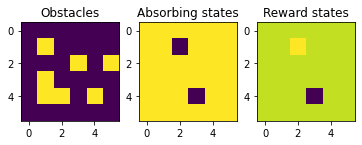

In [5]:
### Define the grid
print("Creating the Grid world, represented as:\n")
grid = GridWorld(p)

## Little warm-up with da uniform policy

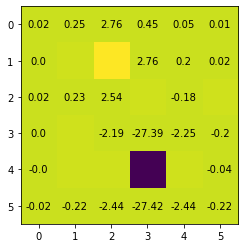

It took 12 epochs


In [6]:
# Plot policy
Policy = np.zeros((grid.state_size, grid.action_size))
Policy = Policy + 0.25

# Policy evaluation
val, epochs = grid.policy_evaluation(Policy, gamma, 0.00001)

# Plot value function
grid.draw_value(val)

# Plot number of epochs
print("It took {} epochs".format(epochs))

## b. Dynamic Programming

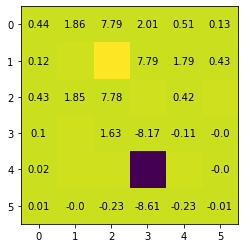

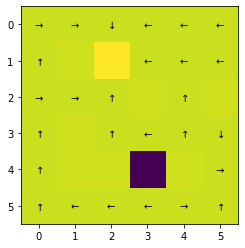

It took 28 epochs


In [7]:
# Policy iteration algorithm
V_opt, pol_opt, epochs = grid.policy_iteration(gamma, 0.0001)

# Plot value function for policy iteration
grid.draw_value(V_opt, save_link="dp_optimal_value_function.png")

# Plot policy for policy iteration
grid.draw_deterministic_policy(np.array([np.argmax(pol_opt[row,:]) for row in range(grid.state_size)]), save_link="dp_optimal_policy.png")

# Plot number of epochs
print("It took {} epochs".format(epochs))

## c. Monte Carlo RL

In [8]:
Q = np.zeros((grid.state_size, 4))
Q_2 = np.zeros((grid.state_size, 4)) + np.array([0, 1, 1, 0])
trace = grid.simulate_episode(Q, epsilon=0.05, verbose=False)

trace[0::3], trace[1::3], (len(trace) - 1)/3

(array([24., 25., 25., 26., 21.]), array([0., 0., 0., 0.]), 4.0)



Its graphical representation is:



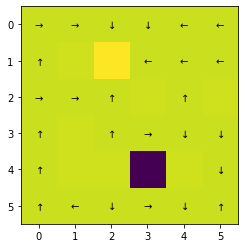


It took 10000 epochs



In [19]:
# Policy iteration algorithm
Q_opt, pol_opt, epochs, rewards = grid.montecarlo_on_control(epsilon_init=0.01, decay_speed=0.001, decay_smooth=1, discount=gamma, learning_rate=1, threshold=0.0001, max_epoch=10000)

# Plot value function for policy iteration
#print("The value of the optimal policy computed using policy iteration is:\n\n {}".format(V_opt))
#print("\n\nIts graphical representation is:\n")
#grid.draw_value(V_opt)

# Plot policy for policy iteration
#print("\n\nThe optimal policy using policy iteration is:\n\n {}".format(pol_opt))
print("\n\nIts graphical representation is:\n")
grid.draw_deterministic_policy(np.array([np.argmax(pol_opt[row,:]) for row in range(grid.state_size)]))

# Plot number of epochs
print("\nIt took {} epochs\n".format(epochs))

In [18]:
np.round(np.max(Q_opt, axis=1), 2), np.round(V_opt, 2)

(array([ 0.07,  1.66,  7.76,  2.05,  0.51,  0.13,  0.1 , -0.6 ,  7.64,
         1.72,  0.42,  0.42,  1.82,  7.77,  0.41,  0.1 ,  1.74, -6.83,
        -0.12,  0.  ,  0.02,  0.89,  0.  ,  0.01, -0.  , -0.28, -8.84,
        -0.18, -0.  ]),
 array([ 0.44,  1.86,  7.79,  2.01,  0.51,  0.13,  0.12,  0.  ,  7.79,
         1.79,  0.43,  0.43,  1.85,  7.78,  0.42,  0.1 ,  1.63, -8.17,
        -0.11, -0.  ,  0.02,  0.  , -0.  ,  0.01, -0.  , -0.23, -8.61,
        -0.23, -0.01]))

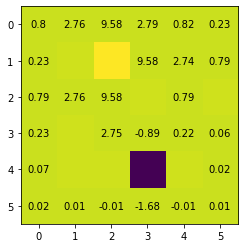

It took 11 epochs


In [1233]:
# Policy evaluation
val, epochs = grid.policy_evaluation(pol_opt, gamma, 0.00001)

# Plot value function
grid.draw_value(val)

# Plot number of epochs
print("It took {} epochs".format(epochs))

In [1234]:
Q_opt, pol_opt, epochs, rewards = grid.montecarlo_on_control(epsilon_init=0.25, decay_speed=0.05, decay_smooth=1, discount=gamma, learning_rate=1, threshold=0.0001, max_epoch=300)
rewards_matrix = np.array([rewards])
for i in range(0, 500):
    Q_opt, pol_opt, epochs, rewards = grid.montecarlo_on_control(epsilon_init=0.25, decay_speed=0.05, decay_smooth=1, discount=gamma, learning_rate=1, threshold=0.0001, max_epoch=300)
    rewards_matrix = np.concatenate((rewards_matrix, np.array([rewards])))

mean_rewards = np.mean(rewards_matrix, axis=0)
std_rewards = np.std(rewards_matrix, axis=0)
plt.figure(figsize=(12, 5))
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards)
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards + std_rewards, color="red")
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards - std_rewards, color="red")
plt.xlabel("Episode")
plt.ylabel("Reward of the episode")
plt.grid()
plt.savefig("montecarlo_control.png")
plt.show()

KeyboardInterrupt: 

In [1205]:
mean_rewards.shape, std_rewards.shape

((300,), (300,))

## d. Temporal Difference RL



Its graphical representation is:



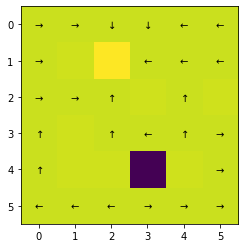


It took 10000 epochs



In [1197]:
# Policy iteration algorithm
Q_opt, pol_opt, epochs, rewards = grid.sarsa_on_td_control(epsilon_init=0.01, decay_speed=0.01, decay_smooth=1, discount=gamma, learning_rate=0.03, threshold=0.0001, max_epoch=10000)

# Plot value function for policy iteration
#print("The value of the optimal policy computed using policy iteration is:\n\n {}".format(V_opt))
#print("\n\nIts graphical representation is:\n")
#grid.draw_value(V_opt)

# Plot policy for policy iteration
#print("\n\nThe optimal policy using policy iteration is:\n\n {}".format(pol_opt))
print("\n\nIts graphical representation is:\n")
grid.draw_deterministic_policy(np.array([np.argmax(pol_opt[row,:]) for row in range(grid.state_size)]))

# Plot number of epochs
print("\nIt took {} epochs\n".format(epochs))

In [ ]:
Q_opt, pol_opt, epochs, rewards = grid.sarsa_on_td_control(epsilon=0.01, discount=gamma, learning_rate=0.03, threshold=0.0001, max_epoch=300)
rewards_matrix = np.array([rewards])
for i in range(0, 500):
    Q_opt, pol_opt, epochs, rewards = grid.sarsa_on_td_control(epsilon=0.01, discount=gamma, learning_rate=0.03, threshold=0.0001, max_epoch=300)
    rewards_matrix = np.concatenate((rewards_matrix, np.array([rewards])))

mean_rewards = np.mean(rewards_matrix, axis=0)
std_rewards = np.std(rewards_matrix, axis=0)
plt.figure(figsize=(12, 5))
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards)
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards + std_rewards, color="red")
plt.plot([i+1 for i in range(0, len(mean_rewards))], mean_rewards - std_rewards, color="red")
plt.xlabel("Episode")
plt.ylabel("Reward of the episode")
plt.grid()
plt.savefig("sarsa_control.png")
plt.show()

In [1046]:
x = None
x != None

False